In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()


Saving dataset.csv to dataset.csv


In [4]:
df = pd.read_csv('dataset.csv')

In [16]:
def calculate_price(df):
    x = 0.1
    df['price'] = 0.0
    base_price = 10.0
    previous_price = base_price
    for index, row in df.iterrows():
        if index == 0 or row['Latitude'] != df.loc[index-1, 'Latitude'] or row['Longitude'] != df.loc[index-1, 'Longitude']:
            previous_price = base_price
        else:
            current_price = previous_price + x * (row['Occupancy'] / row['Capacity'])
            previous_price = current_price
        df.loc[index, 'price'] = previous_price
    return df
df = calculate_price(df.copy())

In [20]:
# Find the minimum and maximum price
min_price = df['price'].min()
max_price = df['price'].max()

print(f"The range of prices is from {min_price:.2f} to {max_price:.2f}")

The range of prices is from 10.00 to 107.73


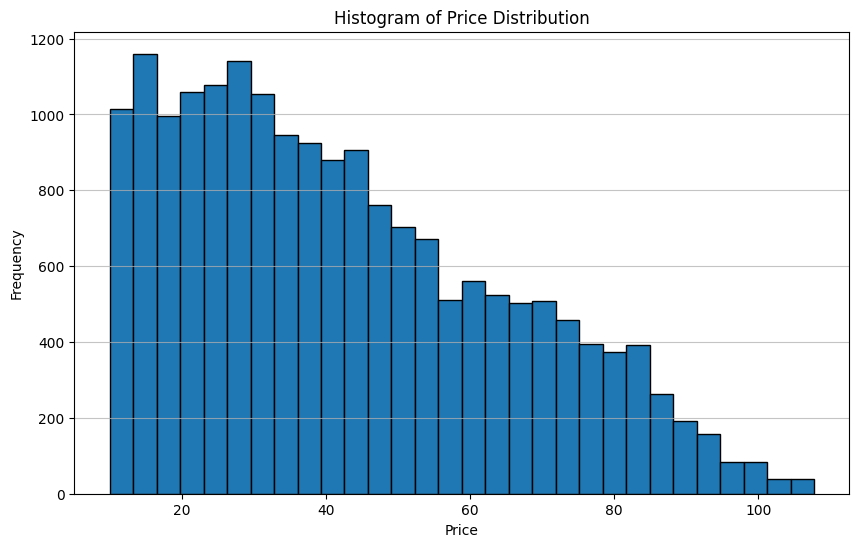

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, edgecolor='black') # You can adjust the number of bins
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price Distribution')
plt.grid(axis='y', alpha=0.75)
plt.show()